In [608]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [609]:
N=2

lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.Model(N=N, T=0, kind='dDSL', delta=[3,3], U=[1,1], mu=[-0.4,-0.4])

In [610]:
H = ham.Hk(2,0)[0]

evals1, Evec = np.linalg.eigh(H)
Evec = Evec.T


In [611]:
vbar = Evec[:6, 0:6]
ubar = Evec[:6, 6:]

Evec2 = np.flip(Evec, axis=0)
u = Evec2[0:6, 0:6]
v = Evec2[0:6, 6:]

In [612]:
U = np.zeros((12,12), dtype=complex)
U[0:6,0:6] = u
U[0:6,6:] = v
U[6:,0:6] = vbar
U[6:,6:] = ubar

In [613]:
np.diag(np.matmul(U, np.matmul(H, np.conjugate(U.T))))

array([ 3.45314018+4.37443581e-17j,  3.45314018-6.88068630e-17j,
        3.0869252 +5.21170621e-18j,  3.0869252 +4.74077609e-18j,
        3.02654919+7.43037599e-18j,  3.02654919+5.58670474e-17j,
       -3.45314018+7.73099677e-17j, -3.45314018+3.50021735e-17j,
       -3.0869252 +2.21252594e-17j, -3.0869252 +3.39037987e-17j,
       -3.02654919+1.82514706e-17j, -3.02654919-3.80313867e-17j])

In [614]:
dels, nus = ham.Deltra(40,HF=True, alpha=0.7, Nmin=20, Nmax=100)

In [615]:
n2 = ham.striped_props()[2]

In [616]:
np.sum(n2)

(4.004091604798433+2.8626575026230924e-19j)

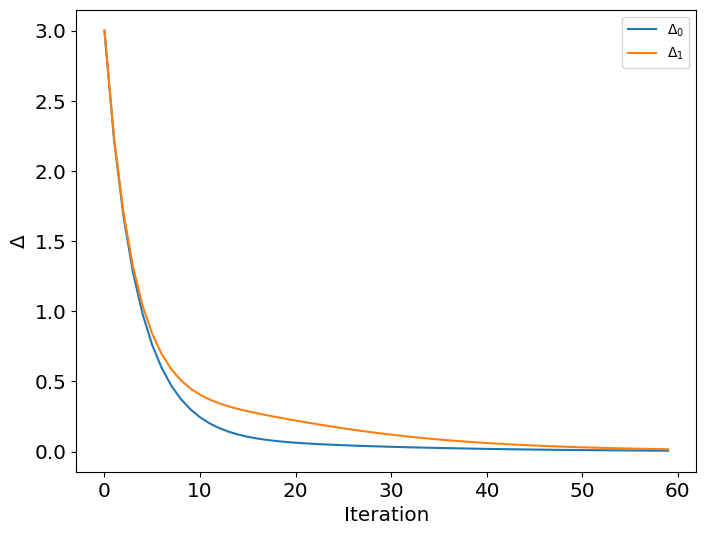

In [617]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

#plt.plot(np.arange(len(dels[0])), dels[0], label = r'$\Delta_A$')
#plt.plot(np.arange(len(dels[0])), dels[1], label = r'$\Delta_B$')
#plt.plot(np.arange(len(dels[0])), dels[2], label = r'$\Delta_C$')
for i,d in enumerate(dels):
    plt.plot(np.arange(len(dels[0])), np.real(d), label = f'$\Delta_{i}$')

plt.legend()

plt.show()

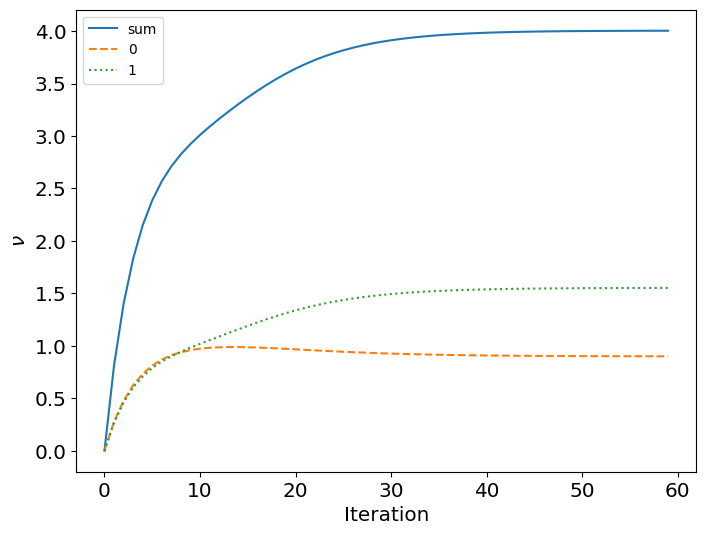

In [618]:
s1 = [np.sum(nus[:,i])+nus[1,i] for i in range(np.shape(nus)[1])]

plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\nu$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)
colors=['dashed', 'dotted', 'dashdot']
plt.plot(np.arange(len(s1)), s1, label = r'sum')
for i in range(2):
    plt.plot(np.arange(len(s1)),nus[i],linestyle=colors[i], label=f'{i}')

plt.legend()
plt.show()

In [619]:
ham.delta

array([0.00603362-8.26355183e-21j, 0.01639582-4.48519828e-19j])

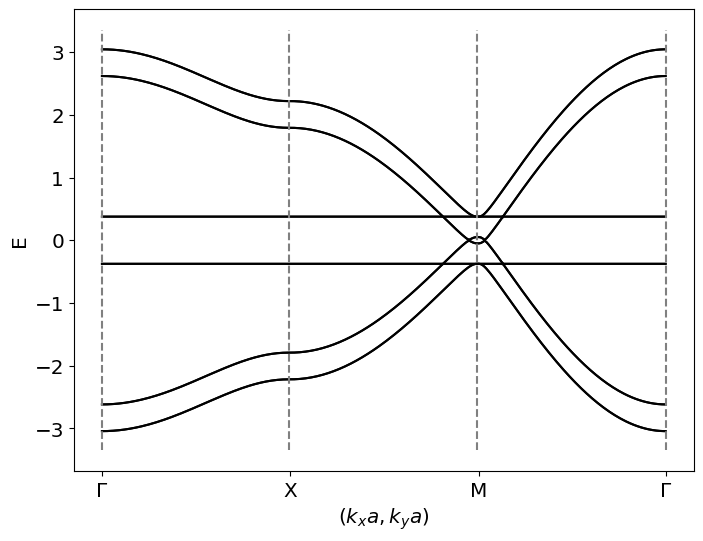

In [620]:
ham.plot_bands()

In [621]:
(np.std(np.abs(dels[:,-3:]), axis=1)>0.01).any()

False

In [622]:
np.std(np.abs(dels[:,-3:]), axis=1)>0.01

array([False, False])

In [623]:
dels

array([[3.        +0.00000000e+00j, 2.22629582-7.11210977e-20j,
        1.67315426-9.13203483e-20j, 1.27254198-1.40733685e-19j,
        0.97828583+3.91460349e-20j, 0.75930485-8.46870680e-20j,
        0.59456105-1.49241317e-19j, 0.46957479-1.64281508e-19j,
        0.37416011-2.06151976e-19j, 0.30099135-1.92476596e-19j,
        0.24469525-1.56594873e-19j, 0.20126629-6.74213496e-20j,
        0.16768064+3.82598949e-20j, 0.14163431+3.38957422e-20j,
        0.12136092+6.76870098e-21j, 0.10550144+1.28258885e-21j,
        0.09300903-5.59124455e-20j, 0.08307805-5.64245970e-20j,
        0.07509001-5.26235738e-20j, 0.06857209-3.99770500e-20j,
        0.06316467-8.13218692e-21j, 0.05859602-6.10973540e-20j,
        0.0546622 -3.76755249e-20j, 0.05121135-3.61889331e-20j,
        0.04813127-2.21054861e-20j, 0.04533972-2.74622059e-20j,
        0.04277692-4.15796733e-20j, 0.04039969-1.10193853e-21j,
        0.03817703-1.29173908e-20j, 0.03608675+6.01463385e-21j,
        0.03411297+1.17655059e-20j, 0.03